### Fraud detection 

### Business Understanding 

- In this dataset , fraud is defined as the transaction labeled  fraudulent from the variable "Class" , where value "1" indicates confirmed fraud and value "0" indicates legitimate behaviour . 

- Missing fraudulent transaction results in direct financial loss , repeated actions by fraudesters , increased chargeback costs and reputational damage . Therefore , false negative are considered high-risk errors .  

- Falsely flagging a legitimate transactions leads to customer friction, lost revenue , potential customer churn . Therefore , False positive is highly costly from a customer - experience perspective . 

- This model is used by a fraud risk team to flag high- risk transaction  . Transaction exceeding a defined risk threshold may be blocked automatically or sent for manual review team , while low- risk transactions are approved in real time .
#### 1 wrong "Legit" classification (blocking a customer's card) is often worse than $1$ missed "Fraud" case.

In [11]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler , RobustScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from xgboost import XGBClassifier

In [12]:
df = pd.read_csv("creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [14]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


### Data Understanding
- Number of rows is 284807 and columns 31
- Number of Null values is Zero 0
- All columns are of Numerical data types
 

In [15]:
# Number of rows and columns of the dataset

print("Number of rows and columns " , df.shape)

Number of rows and columns  (284807, 31)


In [16]:
# Missing Values info 

df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

### The Target Variable   is the "Class" column
- Number of Legitimate transactions are 284315
- Number of fraudulent transactions confirmed are 492 
- Percentage of fraudulant transactions is  0.17304750013189596 % 
- The dataset is highly imbalanced , the fraudulant represent very small fraction of the dataset 
- The fraudulent transactions Amounts are very small compared to the Legitimate transactions , which means hackers usually steal small amounts 

In [17]:
counts_df = df["Class"].value_counts().reset_index()
counts_df = counts_df.rename(columns={"Class": "Total Transaction count",
                                     "index": "Class"})
counts_df

,Class,Total Transaction count
0,0,284315
1,1,492


In [18]:
# Number of legitimate and fraudulent transactions 

print(" - Number of Legitimate transactions are" ,counts_df["Total Transaction count"][0]
      , " and Number of Fraud confirmed are" ,counts_df["Total Transaction count"][1] )
# The percentage of fraudulant transactions 

print(" - Percentage of fraudulant transactions is " 
      , (counts_df["Total Transaction count"][1] / counts_df["Total Transaction count"][0])*100, "% ")

 - Number of Legitimate transactions are 284315  and Number of Fraud confirmed are 492
 - Percentage of fraudulant transactions is  0.17304750013189596 % 


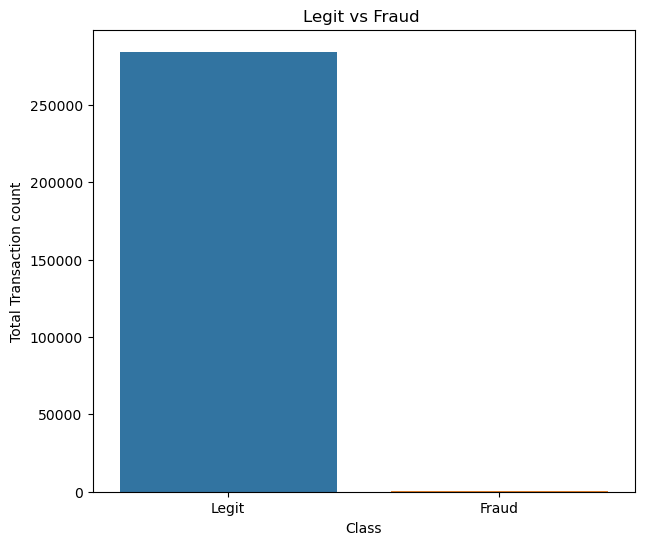

In [56]:
#Fraud Vs Non Fraud Barplot
plt.figure(figsize=(7,6))
sns.barplot(x =counts_df["Class"] , y= counts_df["Total Transaction count"] )
plt.title("Legit vs Fraud ")
plt.xticks([0,1],["Legit","Fraud"])
plt.show()

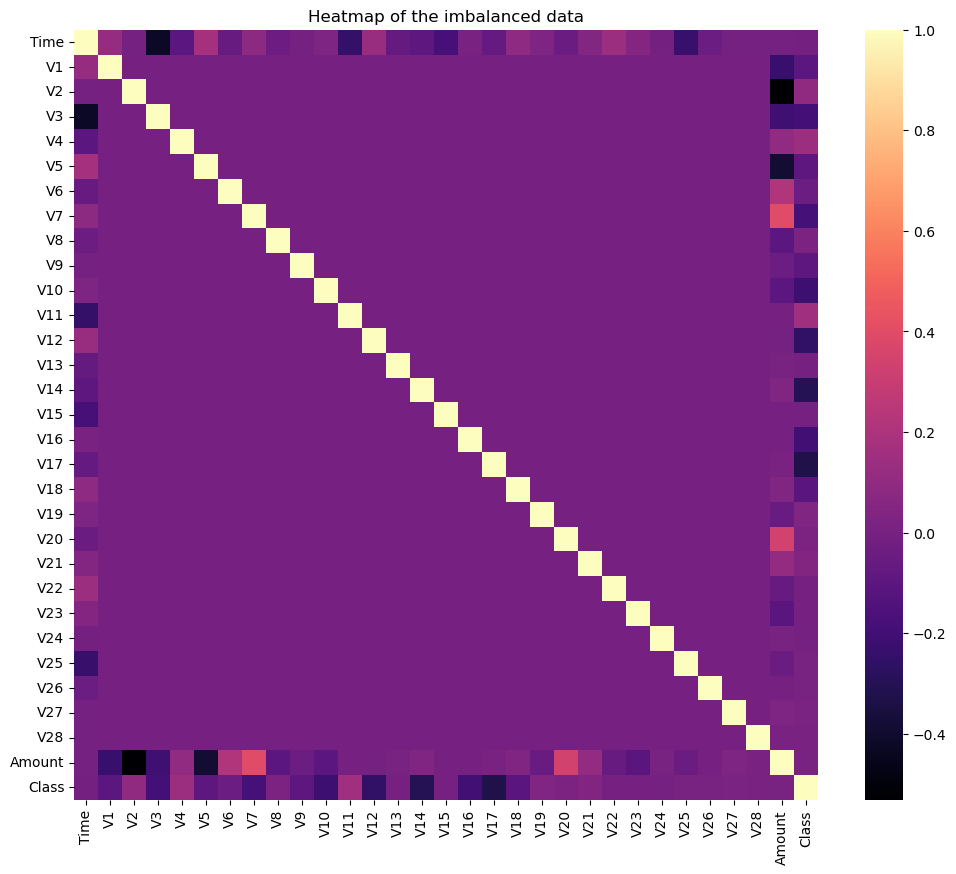

In [22]:
# The heatmap of all the whole picture

plt.figure(figsize=(12,10))
sns.heatmap(df.corr() , cmap='magma')
plt.title("Heatmap of the imbalanced data")
plt.show()

#### After this heatmap , the overall picture is still Unclear . I still dont know what features affect the target variable.

In [23]:
# The correlation between the columns and the target column

corr_matrix=  df.corr()
print(corr_matrix["Class"].sort_values(ascending= False))

Class     1.000000
V11       0.154876
V4        0.133447
V2        0.091289
V21       0.040413
V19       0.034783
V20       0.020090
V8        0.019875
V27       0.017580
V28       0.009536
Amount    0.005632
V26       0.004455
V25       0.003308
V22       0.000805
V23      -0.002685
V15      -0.004223
V13      -0.004570
V24      -0.007221
Time     -0.012323
V6       -0.043643
V5       -0.094974
V9       -0.097733
V1       -0.101347
V18      -0.111485
V7       -0.187257
V3       -0.192961
V16      -0.196539
V10      -0.216883
V12      -0.260593
V14      -0.302544
V17      -0.326481
Name: Class, dtype: float64


#### To understand these features I need to make a smaller dataset . Consisting of equal number of rows between the fraud and legitamte data . That will help me understand the correlation between the  features . 
##### 492 rows of fraud and 492 of randomly selected rows from the legitamte rows . and making them a dataset . And making sure they are shuffeled randomly . 

In [24]:
df2 = df.copy()
df2 = df2.sample(frac= 1)

# here choosing the rows 492 fraud and 492 Legitemate
fraud_col = df2.loc[df2["Class"]==1].reset_index(drop=True)
legit_col = df2.loc[df2["Class"]==0][:492].reset_index(drop=True)

# I then conmined them and shuffled them
balanced_data = pd.concat([fraud_col, legit_col])
new_data = balanced_data.sample(frac=1, random_state= 42).reset_index(drop=True)
new_data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,155464.0,-1.920479,1.698743,0.829216,-1.446019,0.661745,2.451107,-1.269488,-7.350274,2.593897,...,6.018288,-1.585589,0.636164,-0.500226,-0.560509,-0.672381,-1.450033,-1.253432,9.99,0
1,65358.0,1.193916,-0.571085,0.742522,-0.014588,-0.624561,0.832162,-0.833350,0.272897,1.169425,...,-0.049502,0.207265,-0.265272,-0.679294,0.511812,1.246604,-0.028671,-0.006112,31.91,1
2,114937.0,2.045963,-0.206574,-0.516528,0.287514,-0.283866,-0.337946,-0.398502,-0.107625,1.161265,...,-0.216792,-0.397936,0.279831,-0.669657,-0.296694,-0.584397,0.042709,-0.036408,0.71,0
3,138942.0,-2.356348,1.746360,-6.374624,1.772205,-3.439294,1.457811,-0.362577,1.443791,-1.927359,...,0.857942,0.621203,0.964817,-0.619437,-1.732613,0.108361,1.130828,0.415703,727.91,1
4,47923.0,0.364377,1.443523,-2.220907,2.036985,-1.237055,-1.728161,-2.058582,0.358895,-1.393306,...,0.402730,-0.132129,-0.032977,0.460861,0.560404,0.409366,0.539668,0.296918,0.76,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
979,143354.0,1.118331,2.074439,-3.837518,5.448060,0.071816,-1.020509,-1.808574,0.521744,-2.032638,...,0.289861,-0.172718,-0.021910,-0.376560,0.192817,0.114107,0.500996,0.259533,1.00,1
980,59669.0,0.326007,1.286638,-2.007181,2.419675,-1.532902,-1.432803,-2.459530,0.617738,-1.125861,...,0.556895,0.169776,-0.174357,0.308061,0.710996,-0.231030,0.580495,0.300984,6.27,1
981,127086.0,-7.418478,-4.767180,-1.420013,0.846967,1.953078,-0.355196,-1.430330,1.439087,-0.213064,...,-0.620418,-1.887583,-2.414731,-1.414957,-0.421857,-0.129376,0.119113,-1.017682,40.46,0
982,13323.0,-5.454362,8.287421,-12.752811,8.594342,-3.106002,-3.179949,-9.252794,4.245062,-6.329801,...,1.846165,-0.267172,-0.310804,-1.201685,1.352176,0.608425,1.574715,0.808725,1.00,1


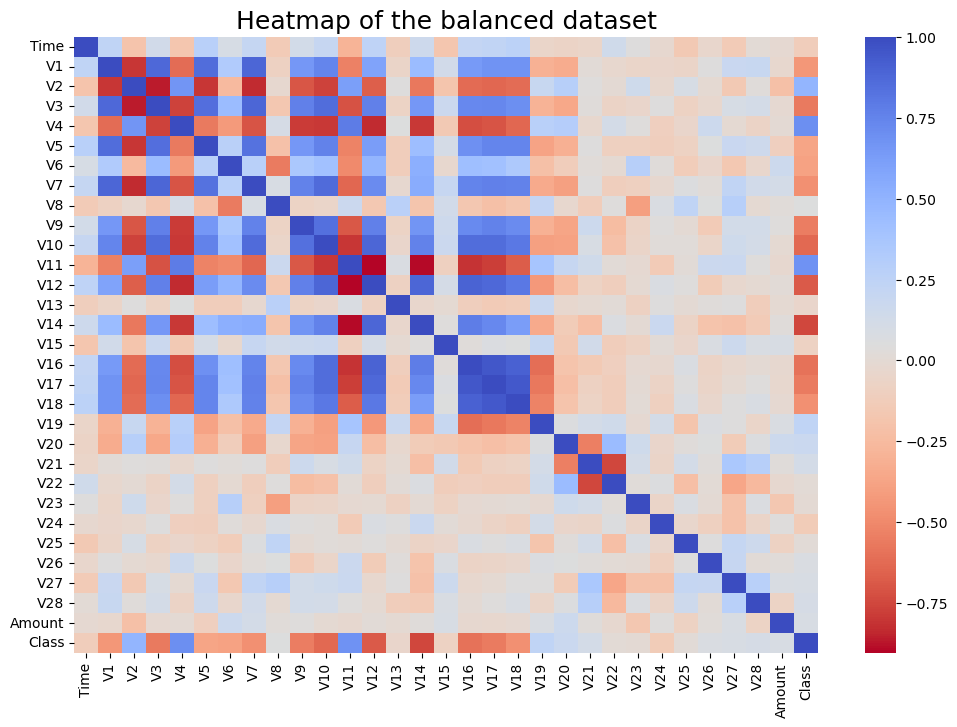

In [25]:
plt.figure(figsize=(12,8))
corr_matrix_balanced = new_data.corr()
sns.heatmap(corr_matrix_balanced , cmap='coolwarm_r' )
plt.title("Heatmap of the balanced dataset", fontsize=18)
plt.show()

### From this correlation I see that , 
- V4, V11, V2 : have positive correlation , which means that when they increase its more likely to me Fraud .
- V14, V12, V10 : Have Negative correlation , which means that when they decrease its more likely to be Fraud .

In [26]:
print(corr_matrix_balanced["Class"].sort_values(ascending=False).rename('after_balance') )

Class     1.000000
V4        0.702242
V11       0.685512
V2        0.490198
V19       0.236784
V20       0.175211
V21       0.121625
V28       0.107847
V27       0.087911
Amount    0.087283
V26       0.075826
V8        0.055164
V25       0.014681
V22       0.007846
V23       0.003312
V13      -0.041852
V15      -0.078945
Time     -0.117115
V24      -0.132324
V5       -0.374665
V6       -0.387281
V1       -0.437147
V18      -0.470268
V7       -0.470798
V9       -0.551655
V17      -0.561142
V3       -0.566315
V16      -0.594961
V10      -0.631031
V12      -0.685225
V14      -0.749129
Name: after_balance, dtype: float64


In [27]:
## This is for ME!!
## Here we are comparing the correlation between the columns before and after balancing 
after = corr_matrix_balanced["Class"].sort_values(ascending=False).rename("Balanced data")
before = corr_matrix["Class"].sort_values(ascending= False).rename("Imbalanced data")

comparing = pd.concat([after, before], axis=1)
comparing

,Balanced data,Imbalanced data
Class,1.000000,1.000000
V4,0.702242,0.133447
V11,0.685512,0.154876
V2,0.490198,0.091289
V19,0.236784,0.034783
V20,0.175211,0.020090
V21,0.121625,0.040413
V28,0.107847,0.009536
V27,0.087911,0.017580
Amount,0.087283,0.005632


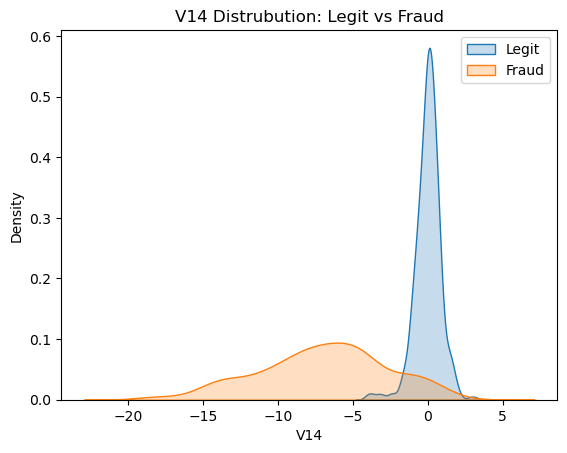

In [28]:
# The Distrubution of the V14 column Fraud v Legit , the curve Overlap is small ,
# which means the this feature is strong.

sns.kdeplot(new_data[new_data["Class"]== 0]["V14"], label="Legit", fill=True)
sns.kdeplot(new_data[new_data["Class"]== 1]["V14"], label="Fraud", fill=True)
plt.title("V14 Distrubution: Legit vs Fraud")
plt.legend()
plt.show()

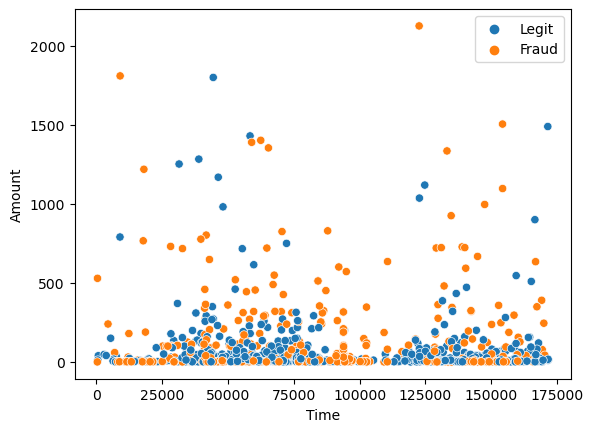

In [29]:
# Amount vs Time 
ax = sns.scatterplot(x='Time', y='Amount', hue='Class', data=new_data)
ax.legend(handles=ax.get_legend_handles_labels()[0], labels=['Legit', 'Fraud'])
plt.show()

### It doesnot  seem to have a strong correlation between Time , Amount and Class

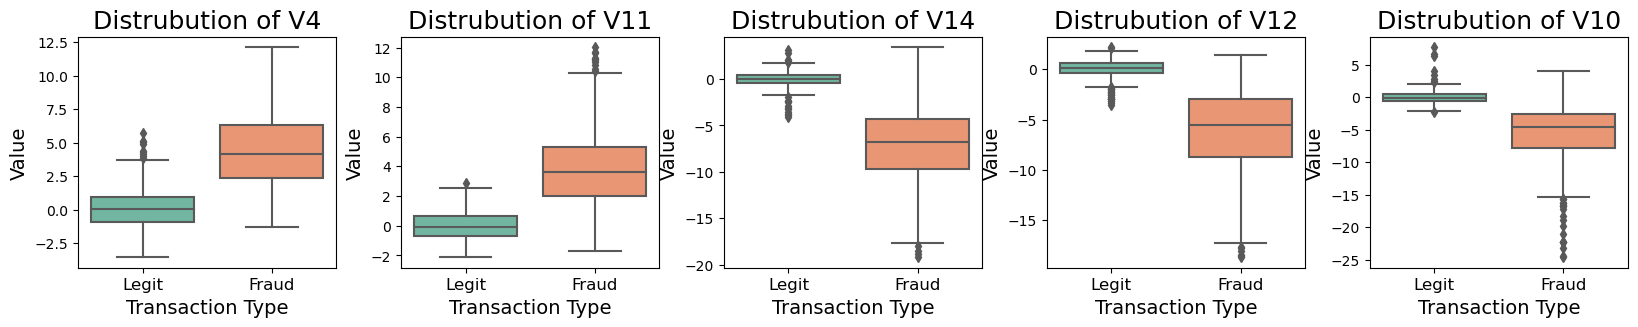

In [73]:
## The Distrubution of values and the most correlated features 

plt.figure(figsize=(20,3))
plt.subplots_adjust(wspace=0.25, hspace=0.5)
features = ["V4","V11","V14","V12","V10"]
for i,v in enumerate(features, 1):
    plt.subplot(1,5,i)
    sns.boxplot(x=new_data.Class, y=new_data[v], palette="Set2")
    plt.title(f"Distrubution of {v}", fontsize=18)
    plt.xlabel("Transaction Type", fontsize=14)
    plt.ylabel("Value", fontsize=14)
    plt.xticks([0,1],["Legit","Fraud"], fontsize=12)


## I should remove the Outliers.

#### From the plots i see that V4 has no Outliers . But V14,V12,V10,V11 have some outliers i should remove all outliers.

#### The plan is to remove the outlier extreme outliers. values below (Q1 - 1.5 *IQR) or above (Q3 + 1.5* IQR). But Only from the fraud data , I will not touch the Legit Data.

#### IQR is the interquartile Range 

##### But i should remove 5% of the fraud rows data MAXIMUM .

In [31]:
# Removing Outliers

v14 = new_data["V14"].loc[new_data["Class"]==1].values
q25 , q75 = np.percentile(v14,25), np.percentile(v14,75)
v14_IQR = q75 -q25

v14_cut = v14_IQR*1.5
v14_lower, v14_upper = q25 - v14_cut , q75 + v14_cut
new_data2 = new_data.drop(new_data[(new_data["V14"]<v14_lower) | (new_data["V14"]>v14_upper)].index )
new_data2


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,155464.0,-1.920479,1.698743,0.829216,-1.446019,0.661745,2.451107,-1.269488,-7.350274,2.593897,...,6.018288,-1.585589,0.636164,-0.500226,-0.560509,-0.672381,-1.450033,-1.253432,9.99,0
1,65358.0,1.193916,-0.571085,0.742522,-0.014588,-0.624561,0.832162,-0.833350,0.272897,1.169425,...,-0.049502,0.207265,-0.265272,-0.679294,0.511812,1.246604,-0.028671,-0.006112,31.91,1
2,114937.0,2.045963,-0.206574,-0.516528,0.287514,-0.283866,-0.337946,-0.398502,-0.107625,1.161265,...,-0.216792,-0.397936,0.279831,-0.669657,-0.296694,-0.584397,0.042709,-0.036408,0.71,0
3,138942.0,-2.356348,1.746360,-6.374624,1.772205,-3.439294,1.457811,-0.362577,1.443791,-1.927359,...,0.857942,0.621203,0.964817,-0.619437,-1.732613,0.108361,1.130828,0.415703,727.91,1
4,47923.0,0.364377,1.443523,-2.220907,2.036985,-1.237055,-1.728161,-2.058582,0.358895,-1.393306,...,0.402730,-0.132129,-0.032977,0.460861,0.560404,0.409366,0.539668,0.296918,0.76,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
978,125612.0,1.889618,1.073099,-1.678018,4.173268,1.015516,-0.009389,-0.079706,0.064071,-0.714517,...,0.203728,0.733796,-0.036560,0.334306,0.147171,0.279556,0.031669,0.035883,3.22,1
979,143354.0,1.118331,2.074439,-3.837518,5.448060,0.071816,-1.020509,-1.808574,0.521744,-2.032638,...,0.289861,-0.172718,-0.021910,-0.376560,0.192817,0.114107,0.500996,0.259533,1.00,1
980,59669.0,0.326007,1.286638,-2.007181,2.419675,-1.532902,-1.432803,-2.459530,0.617738,-1.125861,...,0.556895,0.169776,-0.174357,0.308061,0.710996,-0.231030,0.580495,0.300984,6.27,1
981,127086.0,-7.418478,-4.767180,-1.420013,0.846967,1.953078,-0.355196,-1.430330,1.439087,-0.213064,...,-0.620418,-1.887583,-2.414731,-1.414957,-0.421857,-0.129376,0.119113,-1.017682,40.46,0


In [32]:
v12 = new_data2["V12"].loc[new_data["Class"]==1].values
q25, q75 = np.percentile(v12, 25) , np.percentile(v12,75)
v12_IQR = q75 - q25
v12_cut= v12_IQR *1.5
v12_lower , v12_upper = q25 - v12_cut , q75 + v12_cut
new_data3 = new_data2.drop(new_data2[(new_data2["V12"]<v12_lower) | (new_data2["V12"]>v12_upper)].index)
new_data3

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,155464.0,-1.920479,1.698743,0.829216,-1.446019,0.661745,2.451107,-1.269488,-7.350274,2.593897,...,6.018288,-1.585589,0.636164,-0.500226,-0.560509,-0.672381,-1.450033,-1.253432,9.99,0
1,65358.0,1.193916,-0.571085,0.742522,-0.014588,-0.624561,0.832162,-0.833350,0.272897,1.169425,...,-0.049502,0.207265,-0.265272,-0.679294,0.511812,1.246604,-0.028671,-0.006112,31.91,1
2,114937.0,2.045963,-0.206574,-0.516528,0.287514,-0.283866,-0.337946,-0.398502,-0.107625,1.161265,...,-0.216792,-0.397936,0.279831,-0.669657,-0.296694,-0.584397,0.042709,-0.036408,0.71,0
3,138942.0,-2.356348,1.746360,-6.374624,1.772205,-3.439294,1.457811,-0.362577,1.443791,-1.927359,...,0.857942,0.621203,0.964817,-0.619437,-1.732613,0.108361,1.130828,0.415703,727.91,1
4,47923.0,0.364377,1.443523,-2.220907,2.036985,-1.237055,-1.728161,-2.058582,0.358895,-1.393306,...,0.402730,-0.132129,-0.032977,0.460861,0.560404,0.409366,0.539668,0.296918,0.76,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
978,125612.0,1.889618,1.073099,-1.678018,4.173268,1.015516,-0.009389,-0.079706,0.064071,-0.714517,...,0.203728,0.733796,-0.036560,0.334306,0.147171,0.279556,0.031669,0.035883,3.22,1
979,143354.0,1.118331,2.074439,-3.837518,5.448060,0.071816,-1.020509,-1.808574,0.521744,-2.032638,...,0.289861,-0.172718,-0.021910,-0.376560,0.192817,0.114107,0.500996,0.259533,1.00,1
980,59669.0,0.326007,1.286638,-2.007181,2.419675,-1.532902,-1.432803,-2.459530,0.617738,-1.125861,...,0.556895,0.169776,-0.174357,0.308061,0.710996,-0.231030,0.580495,0.300984,6.27,1
981,127086.0,-7.418478,-4.767180,-1.420013,0.846967,1.953078,-0.355196,-1.430330,1.439087,-0.213064,...,-0.620418,-1.887583,-2.414731,-1.414957,-0.421857,-0.129376,0.119113,-1.017682,40.46,0


In [33]:
v10 = new_data3["V10"].loc[new_data3["Class"]==1].values
q25 , q75 = np.percentile(v10 , 25), np.percentile(v10, 75)
v10_IQR = q75-q25
v10_cut = v10_IQR * 1.5
v10_lower , v10_upper = q25 - v10_cut , q75 + v10_cut

new_data4 = new_data3.drop(new_data3[(new_data3["V10"] <v10_lower)  | (new_data3["V10"]>v10_upper)].index)
new_data4

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,155464.0,-1.920479,1.698743,0.829216,-1.446019,0.661745,2.451107,-1.269488,-7.350274,2.593897,...,6.018288,-1.585589,0.636164,-0.500226,-0.560509,-0.672381,-1.450033,-1.253432,9.99,0
1,65358.0,1.193916,-0.571085,0.742522,-0.014588,-0.624561,0.832162,-0.833350,0.272897,1.169425,...,-0.049502,0.207265,-0.265272,-0.679294,0.511812,1.246604,-0.028671,-0.006112,31.91,1
2,114937.0,2.045963,-0.206574,-0.516528,0.287514,-0.283866,-0.337946,-0.398502,-0.107625,1.161265,...,-0.216792,-0.397936,0.279831,-0.669657,-0.296694,-0.584397,0.042709,-0.036408,0.71,0
3,138942.0,-2.356348,1.746360,-6.374624,1.772205,-3.439294,1.457811,-0.362577,1.443791,-1.927359,...,0.857942,0.621203,0.964817,-0.619437,-1.732613,0.108361,1.130828,0.415703,727.91,1
4,47923.0,0.364377,1.443523,-2.220907,2.036985,-1.237055,-1.728161,-2.058582,0.358895,-1.393306,...,0.402730,-0.132129,-0.032977,0.460861,0.560404,0.409366,0.539668,0.296918,0.76,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
978,125612.0,1.889618,1.073099,-1.678018,4.173268,1.015516,-0.009389,-0.079706,0.064071,-0.714517,...,0.203728,0.733796,-0.036560,0.334306,0.147171,0.279556,0.031669,0.035883,3.22,1
979,143354.0,1.118331,2.074439,-3.837518,5.448060,0.071816,-1.020509,-1.808574,0.521744,-2.032638,...,0.289861,-0.172718,-0.021910,-0.376560,0.192817,0.114107,0.500996,0.259533,1.00,1
980,59669.0,0.326007,1.286638,-2.007181,2.419675,-1.532902,-1.432803,-2.459530,0.617738,-1.125861,...,0.556895,0.169776,-0.174357,0.308061,0.710996,-0.231030,0.580495,0.300984,6.27,1
981,127086.0,-7.418478,-4.767180,-1.420013,0.846967,1.953078,-0.355196,-1.430330,1.439087,-0.213064,...,-0.620418,-1.887583,-2.414731,-1.414957,-0.421857,-0.129376,0.119113,-1.017682,40.46,0


In [34]:
v11 = new_data4["V11"].loc[new_data4["Class"] == 1].values
q25 ,q75 = np.percentile(v11,25) , np.percentile(v11,75)
q11_IQR = q75 - q25
q11_cut = q11_IQR*1.5
q11_lower , q11_upper = q25 - q11_cut , q75+ q11_cut
new_data_final = new_data4.drop(new_data4[(new_data4["V11"]<q11_lower)|(new_data4["V11"]>q11_upper)].index)
new_data_final

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,155464.0,-1.920479,1.698743,0.829216,-1.446019,0.661745,2.451107,-1.269488,-7.350274,2.593897,...,6.018288,-1.585589,0.636164,-0.500226,-0.560509,-0.672381,-1.450033,-1.253432,9.99,0
1,65358.0,1.193916,-0.571085,0.742522,-0.014588,-0.624561,0.832162,-0.833350,0.272897,1.169425,...,-0.049502,0.207265,-0.265272,-0.679294,0.511812,1.246604,-0.028671,-0.006112,31.91,1
2,114937.0,2.045963,-0.206574,-0.516528,0.287514,-0.283866,-0.337946,-0.398502,-0.107625,1.161265,...,-0.216792,-0.397936,0.279831,-0.669657,-0.296694,-0.584397,0.042709,-0.036408,0.71,0
3,138942.0,-2.356348,1.746360,-6.374624,1.772205,-3.439294,1.457811,-0.362577,1.443791,-1.927359,...,0.857942,0.621203,0.964817,-0.619437,-1.732613,0.108361,1.130828,0.415703,727.91,1
4,47923.0,0.364377,1.443523,-2.220907,2.036985,-1.237055,-1.728161,-2.058582,0.358895,-1.393306,...,0.402730,-0.132129,-0.032977,0.460861,0.560404,0.409366,0.539668,0.296918,0.76,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
978,125612.0,1.889618,1.073099,-1.678018,4.173268,1.015516,-0.009389,-0.079706,0.064071,-0.714517,...,0.203728,0.733796,-0.036560,0.334306,0.147171,0.279556,0.031669,0.035883,3.22,1
979,143354.0,1.118331,2.074439,-3.837518,5.448060,0.071816,-1.020509,-1.808574,0.521744,-2.032638,...,0.289861,-0.172718,-0.021910,-0.376560,0.192817,0.114107,0.500996,0.259533,1.00,1
980,59669.0,0.326007,1.286638,-2.007181,2.419675,-1.532902,-1.432803,-2.459530,0.617738,-1.125861,...,0.556895,0.169776,-0.174357,0.308061,0.710996,-0.231030,0.580495,0.300984,6.27,1
981,127086.0,-7.418478,-4.767180,-1.420013,0.846967,1.953078,-0.355196,-1.430330,1.439087,-0.213064,...,-0.620418,-1.887583,-2.414731,-1.414957,-0.421857,-0.129376,0.119113,-1.017682,40.46,0


In [35]:
print("After removing the extreme outliers i removed" ,
      ((len(new_data)-len(new_data_final))/len(new_data))*100,"% of the data")


After removing the extreme outliers i removed 5.182926829268292 % of the data


##### 5% of the dataset ok

####  The Amount feature , do hackers usually steal small or Large Amounts !!!

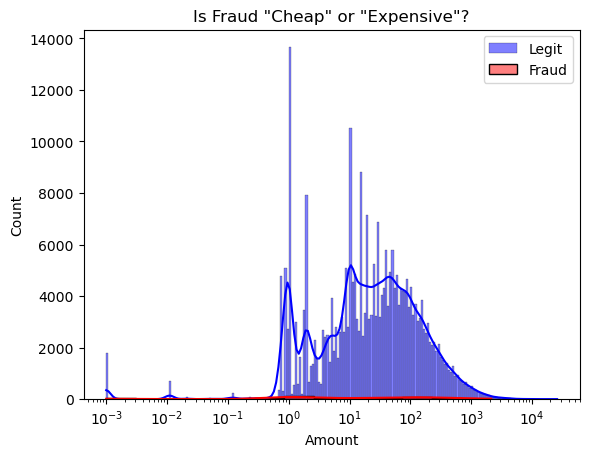

In [36]:
# Trying to understand the Amount Feature
df2 = df.copy() 
df2["Amount"] = df2["Amount"]  + 0.001
sns.histplot(df2[df2['Class'] == 0]['Amount'], label="Legit", color='blue', kde=True, log_scale=True)
sns.histplot(df2[df2['Class'] == 1]['Amount'], label='Fraud', color='red', kde=True, log_scale=True)
plt.title('Is Fraud "Cheap" or "Expensive"?')
plt.legend()
plt.show()

#### from the Graph , the hacker usuallly steal small amounts , because if he stole large amount the become suspecious . Additionally , there are very small Amounts which means the hacker is just checking if the card is still working

#### what about the hour features , will it tell me anything useful 

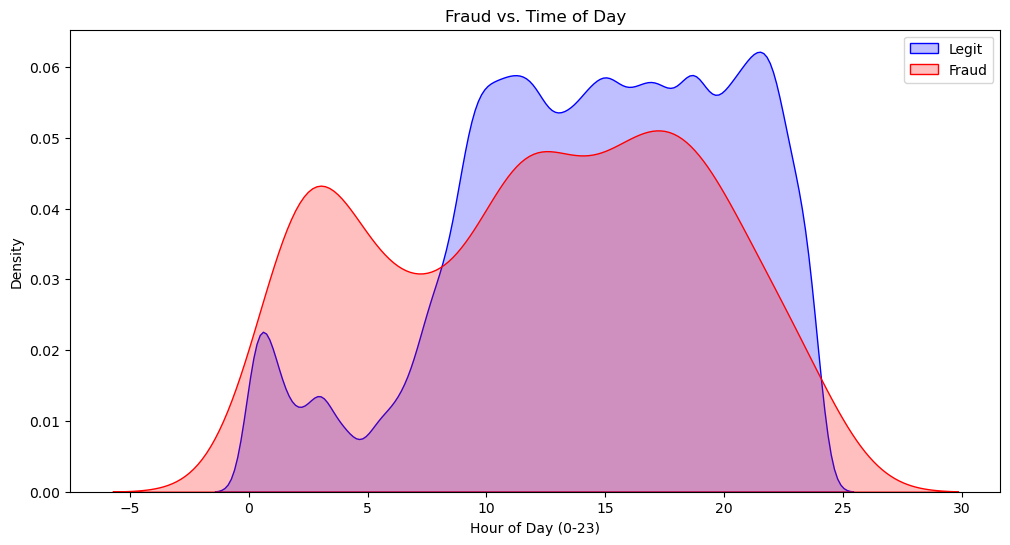

In [37]:
df['Hour'] = (df['Time'] / 3600) % 24

plt.figure(figsize=(12,6))
sns.kdeplot(df[df['Class'] == 0]['Hour'], label='Legit', fill=True, color='blue')
sns.kdeplot(df[df['Class'] == 1]['Hour'], label='Fraud', fill=True, color='red')
plt.title('Fraud vs. Time of Day')
plt.xlabel('Hour of Day (0-23)')
plt.legend()
plt.show()

#### From this graph i can tell that , while Legitimate transactions decrease between hour 0-7 , it looks like the Fraudulent transaction increase signgificantly . Thats why I recommend to have in the night more security , like double authentification . 

#### while in the day it looks like there is no difference , thats why time in not a good factor during the day , we should focus on the features (V14 and so) . 

#### Now i should start fitting my model 
##### but first i will have to divide the dataset into X and Y ,and also i should scale the features TIme and Amount so the can be in the same size as the other features 
#### Because i have outliers i will scaler using the RobustScaler , in this case its better than the Standard Scaler

#### when fitting the model first i will run my baseline model THe LogisticRegression ,and will improve on that . 
#### when fitting my model i will use the balanced data to train my model , but when i test the model i will use the original imbalanced data 

In [38]:
X = df.drop(columns=["Class"])
y = df["Class"]

In [39]:
X_train, X_test, Y_train, Y_test = train_test_split(X,y, test_size=0.2 , random_state=42, 
                                                   stratify=y)

scaler = RobustScaler()

X_train[["Time","Amount","Hour"]] = scaler.fit_transform(X_train[["Time","Amount","Hour"]])
X_test[["Time","Amount","Hour"]] = scaler.transform(X_test[["Time","Amount","Hour"]])

train_data = pd.concat([X_train,Y_train], axis=1)
fraud_train = train_data.loc[train_data["Class"]==1]
legit_train = train_data.loc[train_data["Class"]==0].sample(len(fraud_train),
                                                          random_state=42)


train_balanced = pd.concat([legit_train, fraud_train]).sample(frac=1,
                                                              random_state=42).reset_index(drop=True)
X_train_final = train_balanced.drop(columns = ["Class"])
y_train_final = train_balanced["Class"]

In [40]:
X_train_final

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Hour
0,0.819794,0.667714,3.041502,-5.845112,5.967587,0.213863,-1.462923,-2.688761,0.677764,-3.447596,...,0.329760,-0.941383,-0.006075,-0.958925,0.239298,-0.067356,0.821048,0.426175,-0.212387,0.450651
1,0.913996,-0.772336,-0.448467,0.010341,-0.647727,-0.251590,-0.440783,2.575092,-0.389534,-0.342279,...,0.116063,-0.271007,0.633729,-0.012291,0.277037,0.078988,-0.373191,-0.215636,4.916493,0.705910
2,-0.962425,-2.836574,2.200151,-0.094571,0.026859,-0.888280,0.992732,-1.076284,2.306227,-0.182800,...,0.026016,0.155966,0.238396,-0.626135,-0.133954,0.370881,0.218882,0.073367,-0.096312,-1.628696
3,-0.051447,-0.932727,1.196529,1.352148,-0.476451,0.993062,-0.944069,1.651558,-1.492017,-0.440278,...,0.841814,0.316119,-0.113671,0.593154,0.126950,-0.716042,-0.309710,-0.320254,-0.046625,0.839778
4,-0.542826,1.370664,-0.582927,0.071668,-0.751498,-0.888190,-0.652930,-0.500641,-0.051360,-0.985786,...,-0.367228,-0.682153,0.000031,0.006577,0.245300,1.046648,-0.079435,-0.010155,-0.090466,-0.491709
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
783,-0.142525,-1.032847,-0.687501,1.680568,-2.278279,-1.711903,-0.662416,-0.822389,0.540355,-2.511524,...,0.192511,0.449598,0.062803,0.484299,-0.084087,-0.278100,-0.033240,-0.000251,0.897704,0.592985
784,-0.147141,-7.959872,6.852377,-5.116134,0.828187,-4.886578,-1.638340,-4.530589,5.777132,-0.950472,...,0.683162,0.204509,0.730356,0.357157,0.381293,-0.411893,-2.280072,-0.523068,-0.259847,0.580477
785,0.997968,-0.257083,0.220478,0.529083,-0.603058,-0.894649,-0.086704,0.106173,0.545424,0.963169,...,-0.092000,-0.205921,0.444009,0.035055,-0.818581,-1.136745,0.047044,0.037115,1.078914,0.933448
786,0.144663,-17.976266,12.864989,-19.575066,11.345120,-13.998646,-0.354900,-23.783470,-4.872353,-8.504285,...,-4.300432,2.865772,1.489302,0.386039,-0.232392,0.413827,-3.255981,-0.538963,-0.185943,-1.378752


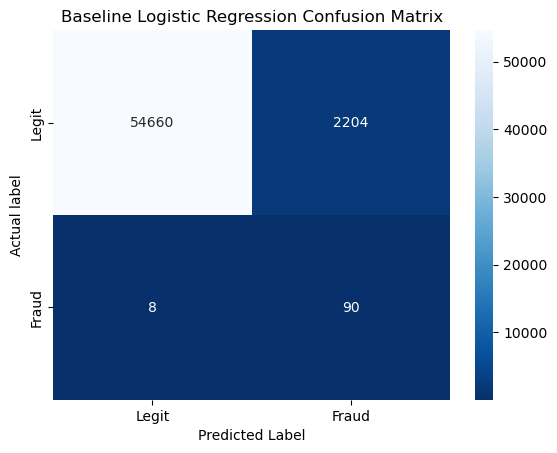

In [74]:
# baseline model Logistic Regression
model = LogisticRegression(random_state= 42)
model.fit(X_train_final, y_train_final)
pred = model.predict(X_test)
conf_matrix = confusion_matrix(Y_test, pred)
sns.heatmap(conf_matrix, annot=True , fmt="d" , cmap="Blues_r",
           xticklabels=["Legit","Fraud"],
           yticklabels=["Legit","Fraud"])
plt.xlabel("Predicted Label")
plt.ylabel("Actual label")
plt.title("Baseline Logistic Regression Confusion Matrix")
plt.show()

#### From the heatmap , it looks like 90/98 frauds have been detected , which is good . 
#### THIS means the the Fasle Negative is low , which is vey good . This means the recall is high

#### However , more than 2200 legit transaction have been labels frauds while they were legit . This means the Precison is really low . the False postive is really high , i should be working on decreaing this number significantly . 

#### This means our customers will be very angry  


In [43]:
print(classification_report(Y_test,pred, target_names =["Legit","Fraud"]))

              precision    recall  f1-score   support

       Legit       1.00      0.96      0.98     56864
       Fraud       0.04      0.92      0.08        98

    accuracy                           0.96     56962
   macro avg       0.52      0.94      0.53     56962
weighted avg       1.00      0.96      0.98     56962



#### The precision of the Fraud transction are very bad . There are 2294 transaction predicted as Fraud ,  only 90 of them were predicted right and 2204 where falsely predicted as fraud while being legit.

### I will try the RandomForest for better results

In [44]:
rf_model = RandomForestClassifier(n_estimators = 100 , n_jobs = -1, random_state=42)

cv_score = cross_val_score(rf_model , X_train_final, y_train_final, cv=5,
                           scoring="roc_auc")

rf_model.fit(X_train_final , y_train_final)
rf_predict = rf_model.predict(X_test)

In [45]:
print("All scores: ",cv_score)
print("Average : ",cv_score.mean())
print("Standard Deviation : " , cv_score.std())

All scores:  [0.98902419 0.95585643 0.99222881 0.99302175 0.97646868]
Average :  0.9813199725553515
Standard Deviation :  0.014051449410694167


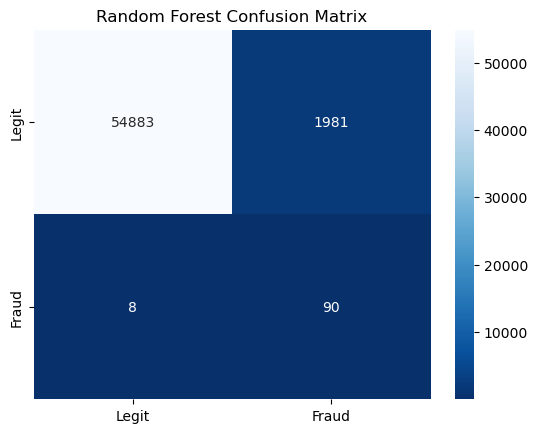

In [46]:
# Random Forest
rf_con_matrix = confusion_matrix(Y_test, rf_predict)
sns.heatmap(rf_con_matrix,annot=True , fmt="d", cmap="Blues_r",
           xticklabels = ["Legit","Fraud"] ,
           yticklabels = ["Legit","Fraud"])
plt.title("Random Forest Confusion Matrix")
plt.show()

### Its slightly better but  the fraud precision is still very weak 

In [47]:
print(classification_report(Y_test, rf_predict, target_names=["Legit","Fraud"]))

              precision    recall  f1-score   support

       Legit       1.00      0.97      0.98     56864
       Fraud       0.04      0.92      0.08        98

    accuracy                           0.97     56962
   macro avg       0.52      0.94      0.53     56962
weighted avg       1.00      0.97      0.98     56962



#### Now i should be working of feature importance , to understand the relationship between the features . I try to eliminate the unimportant features because the are noise. 
#### I will use the mutual information to understand the relationship of the features , Now u will ask me the question , didnot u already do that in the finding the correlation . 
#### Great question, the difference is that the mutual information is better because it can even  detect the nonlinear relationshiop between the features . correlation step only find the linear correlation between the features ,so using mutual information is BETTER . 

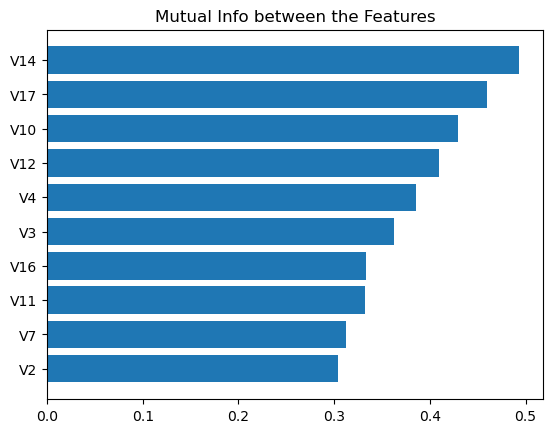

In [48]:
from sklearn.feature_selection import mutual_info_classif
mi_score = mutual_info_classif(X_train_final , y_train_final , random_state=42)
mi_results = pd.Series(mi_score, index= X_train_final.columns)
mi_results = mi_results.sort_values(ascending=False).head(10)

plt.barh(range(len(mi_results)) , mi_results.values)
plt.yticks( range(len(mi_results)) , mi_results.index)
plt.gca().invert_yaxis()
plt.title("Mutual Info between the Features")
plt.show()


#### From the barchart the most important features are the following

In [49]:
important_features = mi_results.index
important_features

Index(['V14', 'V17', 'V10', 'V12', 'V4', 'V3', 'V16', 'V11', 'V7', 'V2'], dtype='object')

#### Now i make i small dataset , it will only contain the important features only , like i eliminated al the noise , lets see if i get better results !!

#### I will use a Random Forest Model

In [50]:
X_train_slim = X_train_final[important_features]
X_test_slim = X_test[important_features]


rf_model_slim = RandomForestClassifier(n_estimators=100 ,n_jobs=-1 , random_state=42)
rf_model_slim.fit(X_train_slim, y_train_final)
rf_slim_pred = rf_model_slim.predict(X_test_slim)




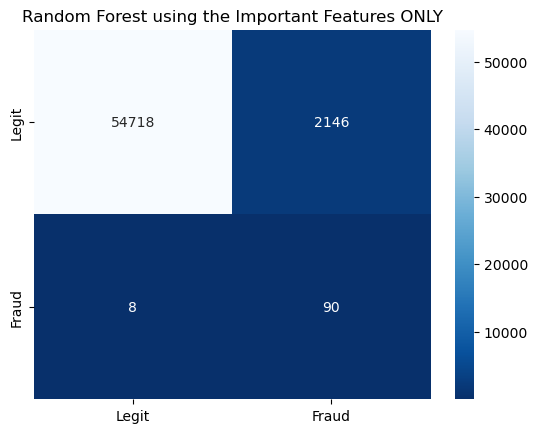

In [51]:
rf_slim_con_matrix = confusion_matrix(Y_test, rf_slim_pred)
sns.heatmap(rf_slim_con_matrix, cmap="Blues_r",fmt="d", annot=True,
           xticklabels = ["Legit","Fraud"],
           yticklabels = ["Legit","Fraud"])
plt.title("Random Forest using the Important Features ONLY")
plt.show()

#### it feels like removing those features made my model worse . Now it looks like my model was good and all the features are important , i will work with the full dataset

#### Now i will make the increase the threshold of the model . Before it was 50-50 . i will increase to to be 0.7 , which means that if the model is 70 % sure its a fraud , then block the transaction . This is decrease the False positive significantly .

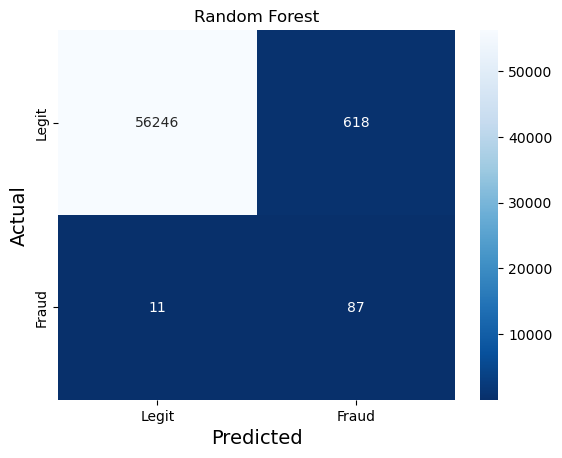

In [52]:
# Random Forest after manuallly modifing the threshold  

rf_con_matrix = confusion_matrix(Y_test, rf_predict)
sns.heatmap(rf_con_matrix,annot=True , fmt="d", cmap="Blues_r",
           xticklabels = ["Legit","Fraud"] ,
           yticklabels = ["Legit","Fraud"])
rf_model_pred_final = rf_model.predict_proba(X_test)[:,1]
rf_pred_final = (rf_model_pred_final>0.7).astype(int)

rf_final_con_matrix = confusion_matrix(Y_test , rf_pred_final)

sns.heatmap(rf_final_con_matrix, annot=True , fmt="d", cmap="Blues_r",
           xticklabels=["Legit","Fraud"],
           yticklabels=["Legit","Fraud"])
plt.title("Random Forest")
plt.xlabel("Predicted", fontsize=14)
plt.ylabel("Actual" , fontsize=14)
plt.show()

### Now after changing the threshold , it is more accurate and cost effective 

In [53]:
print(classification_report(Y_test,rf_pred_final, target_names=["Legit","Fraud"]))

              precision    recall  f1-score   support

       Legit       1.00      0.99      0.99     56864
       Fraud       0.12      0.89      0.22        98

    accuracy                           0.99     56962
   macro avg       0.56      0.94      0.61     56962
weighted avg       1.00      0.99      0.99     56962



### Now i will try the XGBoost Classifier and see if i get better results

C:\Users\boshe\anaconda3\lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\boshe\anaconda3\lib\site-packages\xgboost\core.py:160: UserWarning: [23:43:15] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimatiors" } are not used.

  warnings.warn(smsg, UserWarning)


<Axes: >

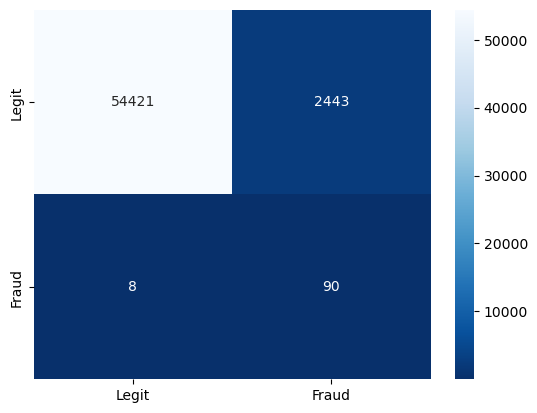

In [55]:
# Xgboost CLassifier model

xgb_model = XGBClassifier(n_estimatiors = 100 , learning_rate=0.05 , n_jobs=4 
                          , random_state = 42, max_depth=6)
xgb_model.fit(X_train_final, y_train_final, early_stopping_rounds=5, 
              eval_set=[(X_test,Y_test)], verbose=False )
xgb_pred = xgb_model.predict(X_test)
xgb_con_matrix = confusion_matrix(Y_test, xgb_pred)
sns.heatmap(xgb_con_matrix, annot=True , cmap="Blues_r", fmt="d",
           xticklabels = ["Legit","Fraud"],
           yticklabels = ["Legit","Fraud"])

#### it looks like i got worse results , which is logical . Althought the XGBoost is smarter , but i feel in this case its overdetect the mistakes resulting in worse results .